In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
HOLDING_DISTANCE = 50
BODY_WEIGHT = 500 # Newtons
ENERGY_COST = 4 / 1100000
ENERGY_RECOVERY = 0.008

In [68]:
1/180

0.005555555555555556

In [38]:
ENERGY_COST

0.00013636363636363637

In [3]:
# Load data

csv_file = "semifinals_last_athlete_cam14_pose_estimation_data.csv"

df = pd.read_csv('../data/keypoints_data/' + csv_file)

# df

In [4]:
filtered_df = df[(df['frame'] >= 5000) & (df['frame'] <= 8500) & (df['bbox_keypoint_x'] > 2000)]

# filtered_df

1 Nose\
2, 3 Left Eye, Right Eye\
4, 5 Left Ear, Right Ear\
6, 7 Left Shoulder, Right Shoulder\
8, 9 Left Elbow, Right Elbow\
10, 11 Left Wrist, Right Wrist\
12, 13 Left Hip, Right Hip\
14, 15 Left Knee, Right Knee\
16, 17 Left Ankle, Right Ankle

In [5]:
left_elbow_x, left_elbow_y, right_elbow_x, right_elbow_y = filtered_df['keypoint_08_x'], filtered_df['keypoint_08_y'], filtered_df['keypoint_09_x'], filtered_df['keypoint_09_y']

left_wrist_x, left_wrist_y, right_wrist_x, right_wrist_y = (
    filtered_df["keypoint_10_x"],
    filtered_df["keypoint_10_y"],
    filtered_df["keypoint_10_x"],
    filtered_df["keypoint_10_y"],
)

In [6]:
def is_wrist_holding(wrist_x1, wrist_y1, wrist_x2, wrist_y2, holding_distance=HOLDING_DISTANCE):
    distances = np.sqrt((wrist_x1 - wrist_x2)**2 + (wrist_y1 - wrist_y2)**2)
    if np.all(distances < holding_distance):
        return 1
    else:
        return 0



In [7]:
def calculate_angle(elbow_x, elbow_y, wrist_x, wrist_y):
    delta_x = wrist_x - elbow_x
    delta_y = wrist_y - elbow_y
    angle = np.arctan2(delta_y, delta_x) * (180 / np.pi)  # Convert radians to degrees
    return angle

# Example usage:
left_elbow_angle = calculate_angle(left_elbow_x, left_elbow_y, left_wrist_x, left_wrist_y)
right_elbow_angle = calculate_angle(right_elbow_x, right_elbow_y, right_wrist_x, right_wrist_y)

print(f"Left elbow angle: {left_elbow_angle}")
print(f"Right elbow angle: {right_elbow_angle}")

Left elbow angle: 4952   -128.927544
4954   -123.690068
4957   -103.240520
4959   -129.805571
4961   -156.037511
           ...    
9713    -39.805571
9714   -113.962489
9715    -59.036243
9716    -63.434949
9717    -63.434949
Length: 3123, dtype: float64
Right elbow angle: 4952    -18.178019
4954    -67.166346
4957   -125.837653
4959   -125.537678
4961   -141.952957
           ...    
9713    180.000000
9714   -172.234834
9715    178.152390
9716    -90.000000
9717    -90.000000
Length: 3123, dtype: float64


In [8]:
def calculate_force(elbow_x, elbow_y, wrist_x, wrist_y, body_weight=BODY_WEIGHT):
    delta_x = wrist_x - elbow_x
    delta_y = wrist_y - elbow_y
    angle_rad = np.arctan2(delta_y, delta_x)
    force = body_weight / np.cos(angle_rad)
    return abs(force)

# Example usage:
left_wrist_force = calculate_force(left_elbow_x, left_elbow_y, left_wrist_x, left_wrist_y)
right_wrist_force = calculate_force(right_elbow_x, right_elbow_y, right_wrist_x, right_wrist_y)

print(f"Left wrist force: {left_wrist_force}")
print(f"Right wrist force: {right_wrist_force}")

Left wrist force: 4952     795.751189
4954     901.387819
4957    2183.031150
4959     781.024968
4961     547.158767
           ...     
9713     650.854140
9714    1231.107225
9715     971.825316
9716    1118.033989
9717    1118.033989
Length: 3123, dtype: float64
Right wrist force: 4952    5.262649e+02
4954    1.288471e+03
4957    8.539847e+02
4959    8.602325e+02
4961    6.349166e+02
            ...     
9713    5.000000e+02
9714    5.046273e+02
9715    5.002601e+02
9716    8.165620e+18
9717    8.165620e+18
Length: 3123, dtype: float64


In [9]:
left_wrist_force = []
right_wrist_force = []

force_data = pd.DataFrame({
    'left_wrist_force': left_wrist_force,
    'right_wrist_force': right_wrist_force
})

force_data

Empty DataFrame
Columns: [left_wrist_force, right_wrist_force]
Index: []

In [11]:
wrist_force_row = []

for i in range(len(filtered_df) - 1):
    row1 = filtered_df.iloc[i]
    row2 = filtered_df.iloc[i + 1]

    print(f"Processing rows {i} and {i + 1}")
    # Add your processing code here
    # For example, you can access the keypoints like this:
    left_wrist_x1, left_wrist_y1 = row1["keypoint_10_x"], row1["keypoint_10_y"]
    left_wrist_x2, left_wrist_y2 = row2["keypoint_10_x"], row2["keypoint_10_y"]
    right_wrist_x1, right_wrist_y1 = row1["keypoint_11_x"], row1["keypoint_11_y"]
    right_wrist_x2, right_wrist_y2 = row2["keypoint_11_x"], row2["keypoint_11_y"]

    left_elbow_x, left_elbow_y = row1["keypoint_08_x"], row1["keypoint_08_y"]
    right_elbow_x, right_elbow_y = row1["keypoint_09_x"], row1["keypoint_09_y"]

    # Example usage of is_wrist_holding function
    left_wrist_holding = is_wrist_holding(
        left_wrist_x1, left_wrist_y1, left_wrist_x2, left_wrist_y2
    )
    right_wrist_holding = is_wrist_holding(
        right_wrist_x1, right_wrist_y1, right_wrist_x2, right_wrist_y2
    )

    # print(f"Left wrist holding between rows {i} and {i + 1}: {left_wrist_holding}")
    # print(f"Right wrist holding between rows {i} and {i + 1}: {right_wrist_holding}")

    if left_wrist_holding & right_wrist_holding:

        left_wrist_force = calculate_force(
            left_elbow_x, left_elbow_y, left_wrist_x1, left_wrist_y1, body_weight=BODY_WEIGHT/2
        )
        right_wrist_force = calculate_force(
            right_elbow_x, right_elbow_y, right_wrist_x1, right_wrist_y1, body_weight=BODY_WEIGHT/2
        )
        # left_wrist_force = left_wrist_force.append(calculate_force(left_elbow_x, left_elbow_y, left_wrist_x1, left_wrist_y1))
        # print(f"Left wrist force in rows {i}: {left_wrist_force}")
    elif left_wrist_holding | right_wrist_holding:

        if left_wrist_holding:
            left_wrist_force = calculate_force(
                left_elbow_x, left_elbow_y, left_wrist_x1, left_wrist_y1, body_weight=BODY_WEIGHT/2
            )
            right_wrist_force = 0
        else:
            right_wrist_force = calculate_force(
                right_elbow_x, right_elbow_y, right_wrist_x1, right_wrist_y1, body_weight=BODY_WEIGHT/2
            )
            left_wrist_force = 0
        
    else:
        right_wrist_force = 0


        left_wrist_force = 0
        # print(f"Left wrist force in rows {i}: {left_wrist_force}")


    wrist_force_row.append(
        {
            "left_wrist_force": left_wrist_force,
            "right_wrist_force": right_wrist_force,
        }
    )

wrist_force_row

Processing rows 0 and 1
Processing rows 1 and 2
Processing rows 2 and 3
Processing rows 3 and 4
Processing rows 4 and 5
Processing rows 5 and 6
Processing rows 6 and 7
Processing rows 7 and 8
Processing rows 8 and 9
Processing rows 9 and 10
Processing rows 10 and 11
Processing rows 11 and 12
Processing rows 12 and 13
Processing rows 13 and 14
Processing rows 14 and 15
Processing rows 15 and 16
Processing rows 16 and 17
Processing rows 17 and 18
Processing rows 18 and 19
Processing rows 19 and 20
Processing rows 20 and 21
Processing rows 21 and 22
Processing rows 22 and 23
Processing rows 23 and 24
Processing rows 24 and 25
Processing rows 25 and 26
Processing rows 26 and 27
Processing rows 27 and 28
Processing rows 28 and 29
Processing rows 29 and 30
Processing rows 30 and 31
Processing rows 31 and 32
Processing rows 32 and 33
Processing rows 33 and 34
Processing rows 34 and 35
Processing rows 35 and 36
Processing rows 36 and 37
Processing rows 37 and 38
Processing rows 38 and 39
Proce

[{'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(1091.515574785811), 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(390.5124837953327),
  'right_wrist_force': np.float64(426.9923713687407)},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(257.6941016011038), 'right_wrist_force': 0},
 {'left_wrist_force': 0, 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(315.94179032858733), 'right_wrist_force': 0},
 {'left_wrist_force': np.float64(292.67200038774484),
  'right_wrist_force': np.float64(390.5124837953327)},
 {'left_wrist_force': np.float64(287.1705394265849),
  'right_wrist_force': np.float64(353.5533905932738)},
 {'left_wrist_force': np.float64(314.29473291533543),
  'right_wrist_force': np.float64(400.195264839553)},
 {'left_wrist_force': np.float64(310.53746634752497),
  'right_wrist_force': np.fl

In [12]:
wrist_force_data = pd.DataFrame(wrist_force_row)

wrist_force_data = wrist_force_data[
    (wrist_force_data["left_wrist_force"].abs() < 1e4)
    & (wrist_force_data["right_wrist_force"].abs() < 1e4)
]

wrist_force_data



left_wrist_force  right_wrist_force
0             0.000000           0.000000
1             0.000000           0.000000
2          1091.515575           0.000000
3           390.512484         426.992371
4             0.000000           0.000000
...                ...                ...
3117        325.427070         250.283286
3118        325.427070         250.283286
3119        615.553613         254.950976
3120          0.000000           0.000000
3121        559.016994         559.016994

[2886 rows x 2 columns]

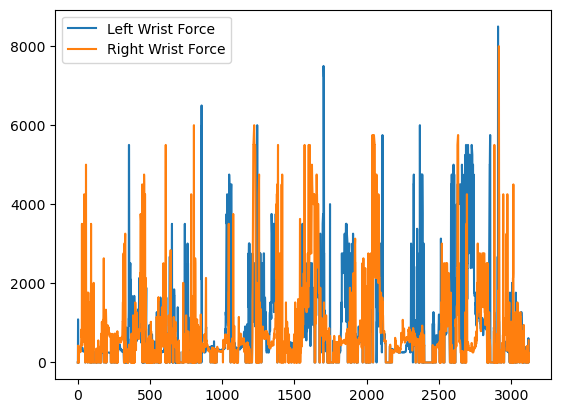

In [13]:


# Plotting the data
plt.plot(wrist_force_data["left_wrist_force"], label="Left Wrist Force")
plt.plot(wrist_force_data["right_wrist_force"], label="Right Wrist Force")
plt.legend()
plt.show()



In [106]:
wrist_force_data.to_csv('wrist_force_data.csv', index=False)

1 Nose\
2, 3 Left Eye, Right Eye\
4, 5 Left Ear, Right Ear\
6, 7 Left Shoulder, Right Shoulder\
8, 9 Left Elbow, Right Elbow\
10, 11 Left Wrist, Right Wrist\
12, 13 Left Hip, Right Hip\
14, 15 Left Knee, Right Knee\
16, 17 Left Ankle, Right Ankle

### Transform the wrist force to the engergy cost

In [19]:
wrist_force_data['total_wrist_force'] = wrist_force_data['left_wrist_force'] + wrist_force_data['right_wrist_force']
# wrist_force_data

print(f"left wrist force sum: " + str(sum(wrist_force_data['left_wrist_force'])))

print(f"right wrist force sum: " + str(sum(wrist_force_data['right_wrist_force'])))



left wrist force sum: 2242882.2693302585
right wrist force sum: 1994813.0331757143


In [64]:
initial_left_wrist_energy = 3
initial_right_wrist_energy = 3



for i in range(len(wrist_force_data)):
    if i == 0:
        if wrist_force_data['left_wrist_force'].iloc[0] == 0:
            wrist_force_data["left_wrist_energy"].iloc[0] = initial_left_wrist_energy
        if wrist_force_data['right_wrist_force'].iloc[0] == 0:
            wrist_force_data["right_wrist_energy"].iloc[0] = initial_right_wrist_energy
        if wrist_force_data['left_wrist_force'].iloc[0] != 0:
            wrist_force_data["left_wrist_energy"].iloc[0] = initial_left_wrist_energy - wrist_force_data['left_wrist_force'].iloc[0] * ENERGY_COST
        if wrist_force_data['right_wrist_force'].iloc[0] != 0:
            wrist_force_data["right_wrist_energy"].iloc[0] = initial_right_wrist_energy - wrist_force_data['right_wrist_force'].iloc[0] * ENERGY_COST

    if i != 0:
        if wrist_force_data['left_wrist_force'].iloc[i] == 0:
            wrist_force_data["left_wrist_energy"].iloc[i] = (
                wrist_force_data["left_wrist_energy"].iloc[i - 1] + ENERGY_RECOVERY
                if wrist_force_data["left_wrist_energy"].iloc[i - 1] + ENERGY_RECOVERY
                < initial_left_wrist_energy
                else initial_left_wrist_energy
            )

        if wrist_force_data['right_wrist_force'].iloc[i] == 0:
            wrist_force_data["right_wrist_energy"].iloc[i] = (
                wrist_force_data["right_wrist_energy"].iloc[i - 1] + ENERGY_RECOVERY
                if wrist_force_data["right_wrist_energy"].iloc[i - 1] + ENERGY_RECOVERY
                < initial_right_wrist_energy
                else initial_right_wrist_energy
            )
        if wrist_force_data['left_wrist_force'].iloc[i] != 0:
            wrist_force_data["left_wrist_energy"].iloc[i] = (
                wrist_force_data["left_wrist_energy"].iloc[i - 1]
                - wrist_force_data["left_wrist_force"].iloc[i] * ENERGY_COST
            )
        if wrist_force_data['right_wrist_force'].iloc[i] != 0:
            wrist_force_data["right_wrist_energy"].iloc[i] = (
                wrist_force_data["right_wrist_energy"].iloc[i - 1]
                - wrist_force_data["right_wrist_force"].iloc[i] * ENERGY_COST
            )

wrist_force_data

/tmp/ipykernel_1349/541850726.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  wrist_force_data["left_wrist_energy"].iloc[0] = initial_left_wrist_energy
/tmp/ipykernel_1349/541850726.py:12: FutureWarning: ChainedAssignmentError: behaviou

left_wrist_force  right_wrist_force  total_wrist_force  \
0             0.000000           0.000000           0.000000   
1             0.000000           0.000000           0.000000   
2          1091.515575           0.000000        1091.515575   
3           390.512484         426.992371         817.504855   
4             0.000000           0.000000           0.000000   
...                ...                ...                ...   
3117        325.427070         250.283286         575.710356   
3118        325.427070         250.283286         575.710356   
3119        615.553613         254.950976         870.504588   
3120          0.000000           0.000000           0.000000   
3121        559.016994         559.016994        1118.033989   

      left_wrist_energy  right_wrist_energy  
0              3.000000            3.000000  
1              3.000000            3.000000  
2              2.996031            3.000000  
3              2.994611            2.998447  
4              3.000000            3.000000  
...                 ...                 ...  
3117           0.024907            1.785593  
3118           0.023724            1.784683  
3119           0.021485            1.783756  
3120           0.029485            1.791756  
3121           0.027452            1.789723  

[2886 rows x 5 columns]

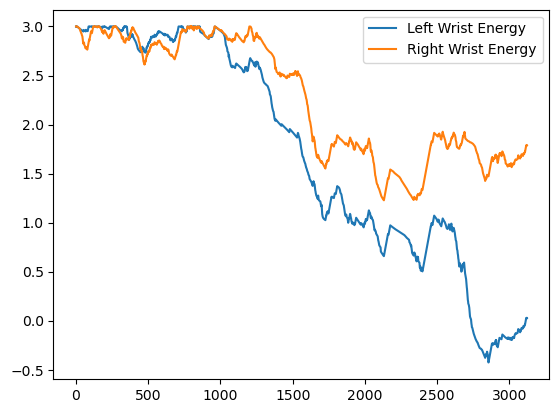

In [66]:
plt.plot(wrist_force_data["left_wrist_energy"], label="Left Wrist Energy")
plt.plot(wrist_force_data["right_wrist_energy"], label="Right Wrist Energy")
plt.legend()

In [67]:
wrist_force_data.to_csv("wrist_force_data2.csv", index=False)

### TODO:
- [ ] Consider the angle bwtween the upper arm and the lower arm
- [ ] Adjust the cost of wrist force engergy with the angle
- [ ] Use the moving window to determine the holding of the wrist
- [ ] Add adjusting parameter to the cost of energy - when it is long time holding the wrist, the cost of energy will be increased
- [ ] Add adjusting parameter to the recovery of the energy from rest, the longer the resting, the lower energy will get from the rest
- [ ] Also consider the accumulation of the fatigue during the climbing
- [ ] 